In [1]:
var LEN_YEARS = 5;
var TOP_N_REPOS = 10;

var openDigger = require('../src/open_digger');
var year = 2023, startMonth = 1, endMonth = 12, startYear = year - LEN_YEARS + 1;
var years = Array.from({ length: LEN_YEARS }, (_, i) => i + startYear); // [2019, 2020, 2021, 2022, 2023]
var baseOptions = {
    startYear, endYear: year,
    startMonth, endMonth,
    groupTimeRange: 'year',
    order: 'DESC'
};

In [3]:
openDigger.index.openrank.getRepoOpenrank({
    ...baseOptions, 
    labelUnion: [':technology/database'], 
    startYear: year, endYear: year, 
    groupBy: 'Tech-1', 
    limit: -1
}).then(data => {
    var data = data.filter(i => i.id.startsWith(':technology/database'));
    data.map(row => {
        var parts = row.name.split(/ - /);
        row.name = parts[parts.length - 1];
        return row;
    });
    console.table(data);
});

┌─────────┬────────────────────────────────────────┬──────────┬───────────────────┬──────────────┐
│ (index) │                   id                   │ platform │       name        │   openrank   │
├─────────┼────────────────────────────────────────┼──────────┼───────────────────┼──────────────┤
│    0    │   ':technology/database/relational'    │  'All'   │   'Relational'    │ [ 57567.71 ] │
│    1    │    ':technology/database/key_value'    │  'All'   │    'Key-value'    │ [ 21636.15 ] │
│    2    │    ':technology/database/document'     │  'All'   │    'Document'     │ [ 17115.98 ] │
│    3    │  ':technology/database/search_engine'  │  'All'   │  'Search Engine'  │ [ 8008.35 ]  │
│    4    │   ':technology/database/wide_column'   │  'All'   │   'Wide Column'   │ [ 7811.72 ]  │
│    5    │   ':technology/database/time_series'   │  'All'   │   'Time Series'   │ [ 7714.99 ]  │
│    6    │      ':technology/database/graph'      │  'All'   │      'Graph'      │  [ 5145.1 ]  │
│    7    

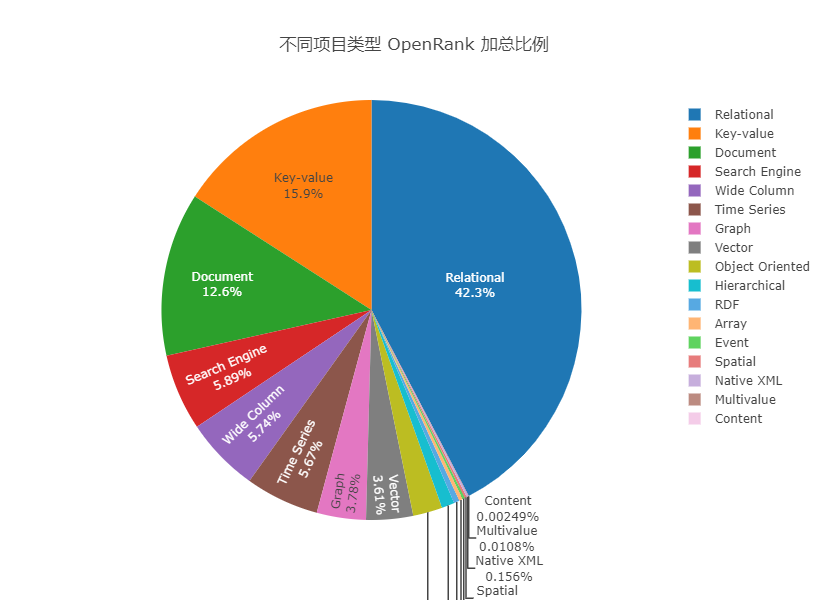

In [4]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':technology/database'],
    startYear: 2023, endYear: 2023, endMonth: 12,
    groupBy: 'Tech-1',
    groupTimeRange: 'year',
    order: 'DESC',
    limit: -1
}).then(data => {
    var data = data.filter(i => i.id.startsWith(':technology/database'));
    data.map(row => {
        var parts = row.name.split(/ - /);
        row.name = parts[parts.length - 1];
        return row;
    });
    openDigger.render.plotly([
    {labels: data.map(item => item.name), values: data.map(item => item.openrank[0]),type:'pie', name: 'times', textinfo: "label+percent"}], 
    {
        title: '不同项目类型 OpenRank 加总比例',
        xaxis: {type: 'category'},
        height: 600,
        //width:1050,
    });
})

In [2]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':technology/database'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬─────────────────────────┬─────────────┐
│ (index) │     id      │ platform │          name           │  openrank   │
├─────────┼─────────────┼──────────┼─────────────────────────┼─────────────┤
│    0    │ '60246359'  │ 'GitHub' │ 'ClickHouse/ClickHouse' │ [ 4916.87 ] │
│    1    │ '99919302'  │ 'GitHub' │     'apache/doris'      │ [ 4262.44 ] │
│    2    │  '507775'   │ 'GitHub' │ 'elastic/elasticsearch' │ [ 3706.38 ] │
│    3    │ '16563587'  │ 'GitHub' │ 'cockroachdb/cockroach' │ [ 3425.38 ] │
│    4    │ '402945349' │ 'GitHub' │  'StarRocks/starrocks'  │ [ 3167.61 ] │
│    5    │ '166515022' │ 'GitHub' │     'trinodb/trino'     │ [ 2684.58 ] │
│    6    │ '17165658'  │ 'GitHub' │     'apache/spark'      │ [ 2625.92 ] │
│    7    │ '41986369'  │ 'GitHub' │     'pingcap/tidb'      │ [ 2186.94 ] │
│    8    │ '208728772' │ 'GitHub' │   'milvus-io/milvus'    │ [ 1973.63 ] │
│    9    │ '105944401' │ 'GitHub' │ 'yugabyte/yugabyte-db'  │ [ 1919.15 ] │

In [2]:
openDigger.index.openrank.getRepoOpenrank({
    labelIntersect: [':technology/database/relational'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬─────────────────────────┬─────────────┐
│ (index) │     id      │ platform │          name           │  openrank   │
├─────────┼─────────────┼──────────┼─────────────────────────┼─────────────┤
│    0    │ '60246359'  │ 'GitHub' │ 'ClickHouse/ClickHouse' │ [ 4916.87 ] │
│    1    │ '99919302'  │ 'GitHub' │     'apache/doris'      │ [ 4262.44 ] │
│    2    │ '16563587'  │ 'GitHub' │ 'cockroachdb/cockroach' │ [ 3425.38 ] │
│    3    │ '402945349' │ 'GitHub' │  'StarRocks/starrocks'  │ [ 3167.61 ] │
│    4    │ '166515022' │ 'GitHub' │     'trinodb/trino'     │ [ 2684.58 ] │
│    5    │ '17165658'  │ 'GitHub' │     'apache/spark'      │ [ 2625.92 ] │
│    6    │ '41986369'  │ 'GitHub' │     'pingcap/tidb'      │ [ 2186.94 ] │
│    7    │ '105944401' │ 'GitHub' │ 'yugabyte/yugabyte-db'  │ [ 1919.15 ] │
│    8    │ '44781140'  │ 'GitHub' │   'greenplum-db/gpdb'   │ [ 1894.86 ] │
│    9    │ '20587599'  │ 'GitHub' │     'apache/flink'      │ [ 1787.59 ] │

In [2]:
var starWeight = 1;
var forkWeight = 2;
var database = 'opensource';
var table = 'events';
var topN = 10;
var repoNames = [
 'ClickHouse/ClickHouse',
     'apache/doris'     ,
 'cockroachdb/cockroach',
  'StarRocks/starrocks' ,
     'trinodb/trino'    ,
     'apache/spark'     ,
     'pingcap/tidb'     ,
 'yugabyte/yugabyte-db' ,
   'greenplum-db/gpdb'  ,
     'apache/flink'     ];
var repoNamesStr = repoNames.join('\', \'');
openDigger.driver.clickhouse.query(`
SELECT event_list.repo_id AS repo_id,event_list.repo_name as repo_name, round(sum(sqrt(event_list.score)),2) AS repo_communityvolume 
FROM
(SELECT
wc.repo_id AS repo_id, wc.repo_name as repo_name, wc.actor_id AS actor_id, ${starWeight}*wc.count+${forkWeight}*fc.count AS score
FROM
(SELECT repo_id, repo_name, actor_id, COUNT(*) count FROM ${database}.${table} WHERE type='WatchEvent' AND repo_name in ('${repoNamesStr}') AND toYear(created_at) = '${year}' GROUP BY repo_id,repo_name, actor_id) AS wc
LEFT JOIN
(SELECT repo_id,repo_name, actor_id, COUNT(*) count FROM ${database}.${table} WHERE type='ForkEvent' AND repo_name in ('${repoNamesStr}') AND toYear(created_at) = '${year}' GROUP BY repo_id,repo_name, actor_id) AS fc
ON wc.repo_id=fc.repo_id AND wc.actor_id=fc.actor_id) AS event_list
GROUP BY repo_id, repo_name
`, { format: 'JSONEachRow' }).then(data => {
    console.table(data);
});

┌─────────┬─────────────┬─────────────────────────┬──────────────────────┐
│ (index) │   repo_id   │        repo_name        │ repo_communityvolume │
├─────────┼─────────────┼─────────────────────────┼──────────────────────┤
│    0    │ '166515022' │     'trinodb/trino'     │       2170.79        │
│    1    │  '538924'   │     'pingcap/tidb'      │        54.12         │
│    2    │ '105944401' │ 'yugabyte/yugabyte-db'  │       1025.55        │
│    3    │ '41986369'  │     'pingcap/tidb'      │       2845.03        │
│    4    │ '20587599'  │     'apache/flink'      │       2527.97        │
│    5    │ '17165658'  │     'apache/spark'      │       3369.76        │
│    6    │ '402945349' │  'StarRocks/starrocks'  │       3428.27        │
│    7    │ '11478733'  │ 'ClickHouse/ClickHouse' │        15.41         │
│    8    │ '44781140'  │   'greenplum-db/gpdb'   │        623.83        │
│    9    │ '99919302'  │     'apache/doris'      │       4076.34        │
│   10    │ '16563587'  │

# 2023中国开源年度报告

## 一. 总体宏观洞察

### 1.5 编程语言

#### 1.5.1 2023年开发者使用编程语言榜单

In [2]:
openDigger.driver.clickhouse.query(`
SELECT COUNT(DISTINCT actor_id) AS user_count, COUNT(DISTINCT repo_id) AS repo_count, repo_language  
FROM events 
WHERE repo_language != '' AND toYear(created_at) = '${year}' 
GROUP BY repo_language 
ORDER BY user_count DESC 
LIMIT 20;`, { format: 'JSONEachRow' }).then(data => {
    console.table(data)
});

┌─────────┬────────────┬────────────┬────────────────────┐
│ (index) │ user_count │ repo_count │   repo_language    │
├─────────┼────────────┼────────────┼────────────────────┤
│    0    │  '765589'  │ '1806477'  │    'JavaScript'    │
│    1    │  '629423'  │  '653025'  │      'Python'      │
│    2    │  '564121'  │  '676364'  │       'HTML'       │
│    3    │  '462729'  │  '886453'  │    'TypeScript'    │
│    4    │  '368795'  │  '463660'  │       'Java'       │
│    5    │  '190480'  │  '239187'  │       'CSS'        │
│    6    │  '177905'  │  '135330'  │       'C++'        │
│    7    │  '158159'  │  '180537'  │        'C#'        │
│    8    │  '143433'  │  '165367'  │        'Go'        │
│    9    │  '128186'  │  '272980'  │       'PHP'        │
│   10    │  '122475'  │  '102708'  │ 'Jupyter Notebook' │
│   11    │  '122456'  │  '108209'  │      'Shell'       │
│   12    │  '107918'  │  '80159'   │        'C'         │
│   13    │  '69370'   │  '72778'   │       'Rust'      

#### 1.5.2 2019-2023年开发者使用编程语言趋势

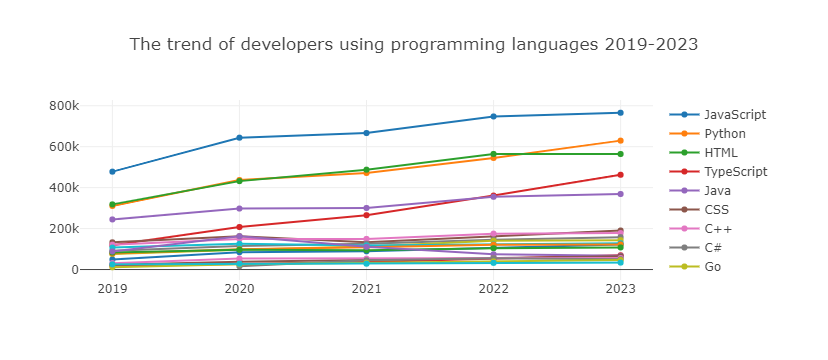

In [3]:
openDigger.driver.clickhouse.query(`
SELECT toYear(created_at) AS year, COUNT(DISTINCT actor_id) AS user_count, COUNT(DISTINCT repo_id) AS repo_count, repo_language
FROM events
WHERE toYear(created_at) IN ('${years.join(`', '`)}') AND repo_language IN (
    SELECT repo_language FROM (
        SELECT COUNT(DISTINCT actor_id) AS user_count, COUNT(DISTINCT repo_id) AS repo_count, repo_language
        FROM events
        WHERE repo_language != '' AND toYear(created_at) = '${year}'
        GROUP BY repo_language
        ORDER BY user_count DESC
        LIMIT 20
    )
)
GROUP BY year, repo_language
ORDER BY year DESC, user_count DESC
`, { format: 'JSONEachRow' }).then(data => {
    var group_key = "repo_language";
    var group_names = [];
    var newArr = [];
    data.forEach(item => {
      if (group_names.indexOf(item[group_key]) === -1) {
        let group_first_record = {};
        Object.keys(item).forEach(key => {
            group_first_record[key] = [item[key]];
        });
        newArr.push(group_first_record);
        group_names.push(item[group_key]);
      } else {
        newArr.forEach(newItem => {
          if (newItem[group_key][0] == item[group_key]) {
            Object.keys(item).forEach(key => {
                newItem[key].push(item[key]);
            });
          }
        })
      }
    });
    data = newArr;
    openDigger.render.plotly(data.map(row => {
        return {
            x: row.year,
            y: row.user_count,
            name: row.repo_language[0]
        };
    }), {title: `The trend of developers using programming languages ${startYear}-${year}`, xasix: { type: 'category' } });
})

## 3.技术领域项目分析

### 3.1 各领域OpenRank Top 10 榜单

### 大数据

In [4]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':technology/big_data'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬─────────────────────────┬─────────────┐
│ (index) │     id      │ platform │          name           │  openrank   │
├─────────┼─────────────┼──────────┼─────────────────────────┼─────────────┤
│    0    │  '7833168'  │ 'GitHub' │    'elastic/kibana'     │ [ 7601.04 ] │
│    1    │ '15111821'  │ 'GitHub' │    'grafana/grafana'    │ [ 7134.37 ] │
│    2    │ '60246359'  │ 'GitHub' │ 'ClickHouse/ClickHouse' │ [ 4941.99 ] │
│    3    │ '283046497' │ 'GitHub' │   'airbytehq/airbyte'   │ [ 4658.86 ] │
│    4    │ '99919302'  │ 'GitHub' │     'apache/doris'      │ [ 4307.26 ] │
│    5    │  '507775'   │ 'GitHub' │ 'elastic/elasticsearch' │ [ 3729.39 ] │
│    6    │ '33884891'  │ 'GitHub' │    'apache/airflow'     │ [ 3642.9 ]  │
│    7    │ '402945349' │ 'GitHub' │  'StarRocks/starrocks'  │ [ 3194.56 ] │
│    8    │ '166515022' │ 'GitHub' │     'trinodb/trino'     │ [ 2703.4 ]  │
│    9    │ '17165658'  │ 'GitHub' │     'apache/spark'      │ [ 2654.02 ] │

### 数据库

In [5]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':technology/database'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬─────────────────────────┬─────────────┐
│ (index) │     id      │ platform │          name           │  openrank   │
├─────────┼─────────────┼──────────┼─────────────────────────┼─────────────┤
│    0    │ '60246359'  │ 'GitHub' │ 'ClickHouse/ClickHouse' │ [ 4941.99 ] │
│    1    │ '99919302'  │ 'GitHub' │     'apache/doris'      │ [ 4307.26 ] │
│    2    │  '507775'   │ 'GitHub' │ 'elastic/elasticsearch' │ [ 3729.39 ] │
│    3    │ '16563587'  │ 'GitHub' │ 'cockroachdb/cockroach' │ [ 3443.7 ]  │
│    4    │ '402945349' │ 'GitHub' │  'StarRocks/starrocks'  │ [ 3194.56 ] │
│    5    │ '166515022' │ 'GitHub' │     'trinodb/trino'     │ [ 2703.4 ]  │
│    6    │ '17165658'  │ 'GitHub' │     'apache/spark'      │ [ 2654.02 ] │
│    7    │ '41986369'  │ 'GitHub' │     'pingcap/tidb'      │ [ 2200.38 ] │
│    8    │ '208728772' │ 'GitHub' │   'milvus-io/milvus'    │ [ 2001.11 ] │
│    9    │ '105944401' │ 'GitHub' │ 'yugabyte/yugabyte-db'  │ [ 1940.75 ] │

### 操作系统

In [6]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':technology/operating_system'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬────────────────────────────────┬─────────────┐
│ (index) │     id      │ platform │              name              │  openrank   │
├─────────┼─────────────┼──────────┼────────────────────────────────┼─────────────┤
│    0    │ '160083795' │ 'GitHub' │     'SerenityOS/serenity'      │ [ 2257.68 ] │
│    1    │ '105627846' │ 'GitHub' │       'reactos/reactos'        │ [ 745.23 ]  │
│    2    │ '24905898'  │ 'GitHub' │        'armbian/build'         │  [ 679.1 ]  │
│    3    │ '179385712' │ 'GitHub' │ 'bottlerocket-os/bottlerocket' │ [ 462.12 ]  │
│    4    │ '181022316' │ 'GitHub' │      'unikraft/unikraft'       │ [ 340.81 ]  │
│    5    │ '36428094'  │ 'GitHub' │          'tock/tock'           │ [ 275.34 ]  │
│    6    │ '61721573'  │ 'GitHub' │   'jens-maus/RaspberryMatic'   │ [ 176.58 ]  │
│    7    │ '97989275'  │ 'GitHub' │      'theseus-os/Theseus'      │ [ 154.98 ]  │
│    8    │ '71775220'  │ 'GitHub' │          'PDP-10/its'          │  [ 69.

### 云原生

In [7]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':technology/cloud_native'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬──────────────────────────┬─────────────┐
│ (index) │     id      │ platform │           name           │  openrank   │
├─────────┼─────────────┼──────────┼──────────────────────────┼─────────────┤
│    0    │ '15111821'  │ 'GitHub' │    'grafana/grafana'     │ [ 7134.37 ] │
│    1    │ '75821432'  │ 'GitHub' │   'llvm/llvm-project'    │ [ 7049.62 ] │
│    2    │ '20580498'  │ 'GitHub' │ 'kubernetes/kubernetes'  │ [ 5374.14 ] │
│    3    │ '60246359'  │ 'GitHub' │ 'ClickHouse/ClickHouse'  │ [ 4941.99 ] │
│    4    │ '48109239'  │ 'GitHub' │     'cilium/cilium'      │ [ 3215.42 ] │
│    5    │  '2310495'  │ 'GitHub' │       'ceph/ceph'        │ [ 3172.49 ] │
│    6    │ '11125589'  │ 'GitHub' │   'keycloak/keycloak'    │ [ 3095.56 ] │
│    7    │ '31558937'  │ 'GitHub' │ 'gravitational/teleport' │ [ 3082.18 ] │
│    8    │ '65214191'  │ 'GitHub' │    'envoyproxy/envoy'    │ [ 2929.08 ] │
│    9    │ '236095576' │ 'GitHub' │  'backstage/backstage'   │ 

### 前端

In [8]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':technology/frontend'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬─────────────────────────┬─────────────┐
│ (index) │     id      │ platform │          name           │  openrank   │
├─────────┼─────────────┼──────────┼─────────────────────────┼─────────────┤
│    0    │ '31792824'  │ 'GitHub' │    'flutter/flutter'    │ [ 9367.81 ] │
│    1    │ '70107786'  │ 'GitHub' │    'vercel/next.js'     │ [ 6638.65 ] │
│    2    │ '275993885' │ 'GitHub' │ 'appsmithorg/appsmith'  │ [ 3474.07 ] │
│    3    │ '71995937'  │ 'GitHub' │       'nuxt/nuxt'       │ [ 3387.23 ] │
│    4    │ '29028775'  │ 'GitHub' │ 'facebook/react-native' │ [ 3260.55 ] │
│    5    │ '34526884'  │ 'GitHub' │ 'ant-design/ant-design' │ [ 3053.25 ] │
│    6    │ '27193779'  │ 'GitHub' │      'nodejs/node'      │ [ 2736.37 ] │
│    7    │ '24195339'  │ 'GitHub' │    'angular/angular'    │ [ 2273.82 ] │
│    8    │  '9384267'  │ 'GitHub' │   'electron/electron'   │ [ 1773.31 ] │
│    9    │ '133442384' │ 'GitHub' │     'denoland/deno'     │ [ 1654.01 ] │

### 人工智能

In [9]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':technology/ai'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬────────────────────────────────────────┬──────────────┐
│ (index) │     id      │ platform │                  name                  │   openrank   │
├─────────┼─────────────┼──────────┼────────────────────────────────────────┼──────────────┤
│    0    │ '65600975'  │ 'GitHub' │           'pytorch/pytorch'            │ [ 10182.45 ] │
│    1    │ '552661142' │ 'GitHub' │        'langchain-ai/langchain'        │ [ 6080.25 ]  │
│    2    │ '65711522'  │ 'GitHub' │         'PaddlePaddle/Paddle'          │ [ 5408.62 ]  │
│    3    │ '155220641' │ 'GitHub' │       'huggingface/transformers'       │ [ 4422.84 ]  │
│    4    │ '527591471' │ 'GitHub' │ 'AUTOMATIC1111/stable-diffusion-webui' │  [ 3881.6 ]  │
│    5    │ '153097643' │ 'GitHub' │       'openvinotoolkit/openvino'       │ [ 3857.31 ]  │
│    6    │ '156939672' │ 'GitHub' │        'microsoft/onnxruntime'         │ [ 3006.75 ]  │
│    7    │ '45717250'  │ 'GitHub' │        'tensorflow/tensorflow'   

### 3.2 各领域 OpenRank Top 10项目近五年变化趋势

In [10]:
var processTechFieldRepoOpenrank = (label, title) => {
    var years = [2019, 2020, 2021, 2022, 2023];
    openDigger.index.openrank.getRepoOpenrank({
        ...baseOptions, labelIntersect: [label], limit: 10
    }).then(data => {
        openDigger.render.plotly(data.map(row => {
            return {
                x: years,
                y: row.openrank,
                name: row.name
            };
        }), {title: `Top 10 OpenRank repositories of ${title} 2019-2023`});
    });
};

In [11]:
var processTechFieldRepoActivity = (label, title) => {
    var years = [2019, 2020, 2021, 2022, 2023];
    openDigger.index.activity.getRepoActivity({
        ...baseOptions, labelIntersect: [label], limit: 10
    }).then(data => {
        openDigger.render.plotly(data.map(row => {
            return {
                x: years,
                y: row.activity,
                name: row.name
            };
        }), {title: `Top 10 Activity repositories of ${title} 2019-2023`});
    });
};

### 大数据

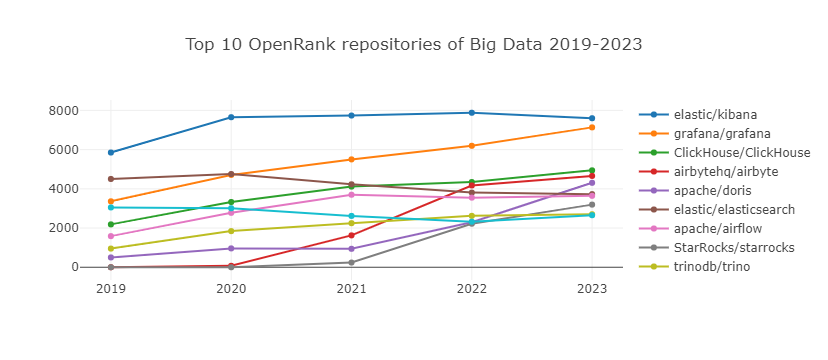

In [12]:
processTechFieldRepoOpenrank(':technology/big_data', 'Big Data');

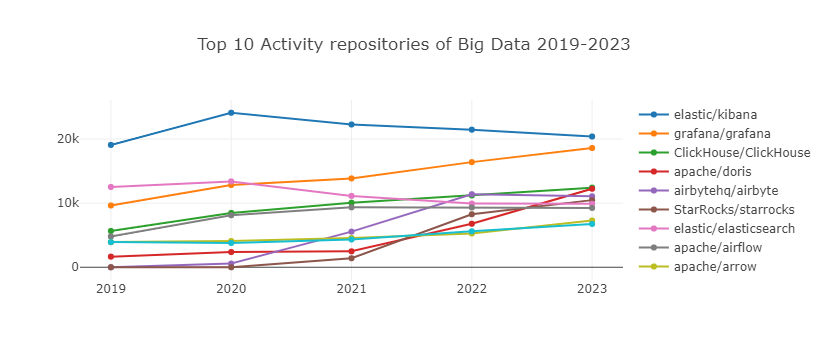

In [13]:
processTechFieldRepoActivity(':technology/big_data', 'Big Data')

### 数据库

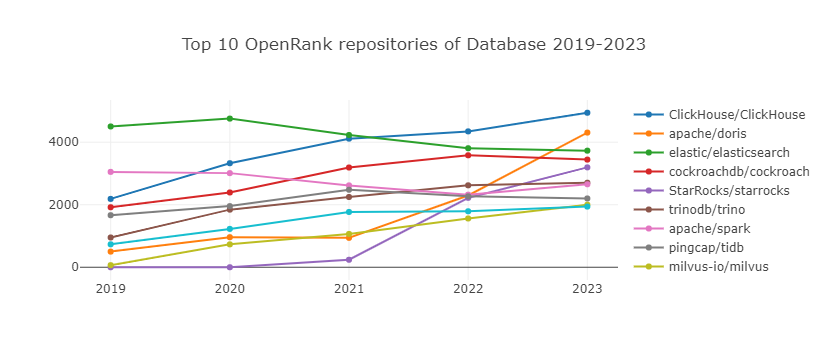

In [14]:
processTechFieldRepoOpenrank(':technology/database', 'Database');

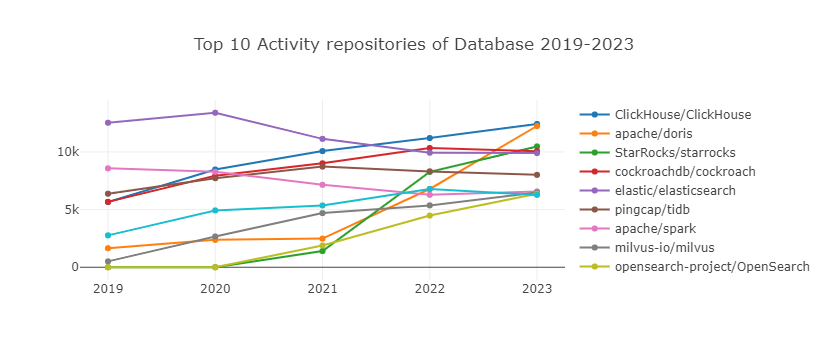

In [15]:
processTechFieldRepoActivity(':technology/database', 'Database');

### 操作系统

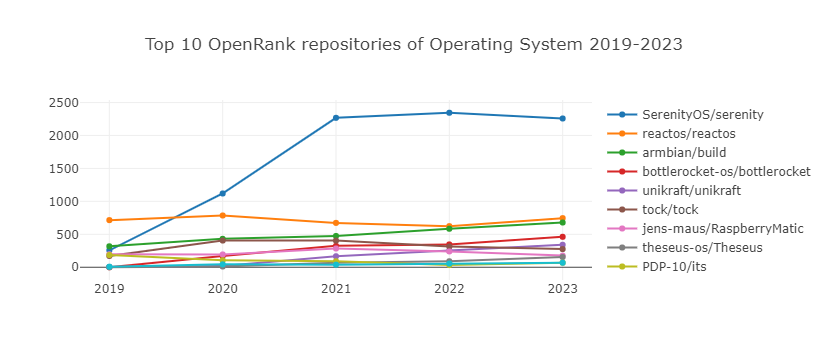

In [16]:
processTechFieldRepoOpenrank(':technology/operating_system', 'Operating System');

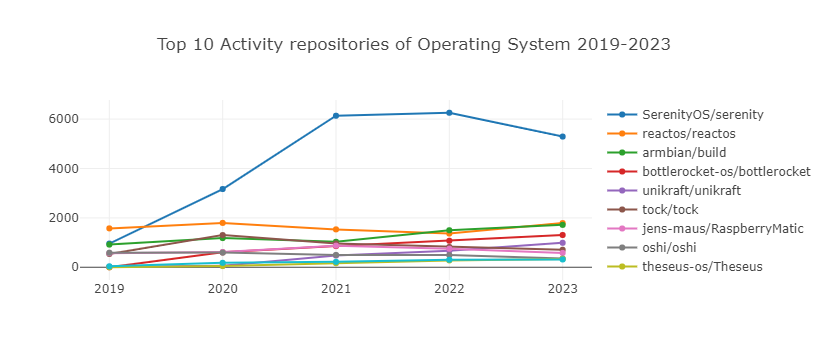

In [17]:
processTechFieldRepoActivity(':technology/operating_system', 'Operating System');

### 云原生

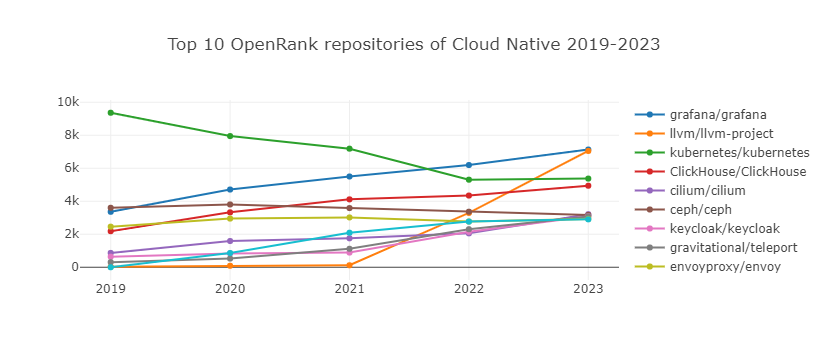

In [18]:
processTechFieldRepoOpenrank(':technology/cloud_native', 'Cloud Native');

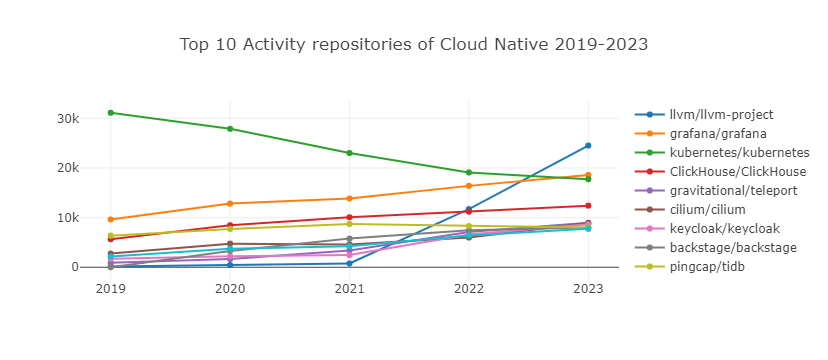

In [19]:
processTechFieldRepoActivity(':technology/cloud_native', 'Cloud Native');

### 前端

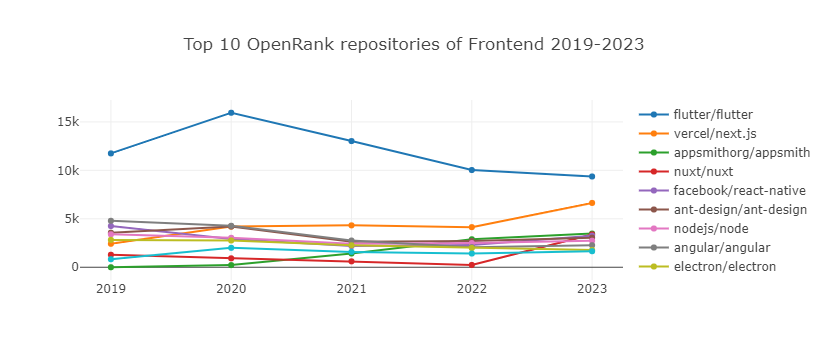

In [20]:
processTechFieldRepoOpenrank(':technology/frontend', 'Frontend');

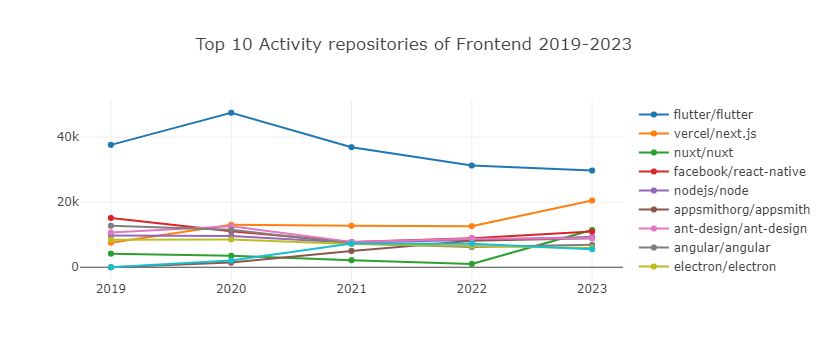

In [21]:
processTechFieldRepoActivity(':technology/frontend', 'Frontend');

### 人工智能

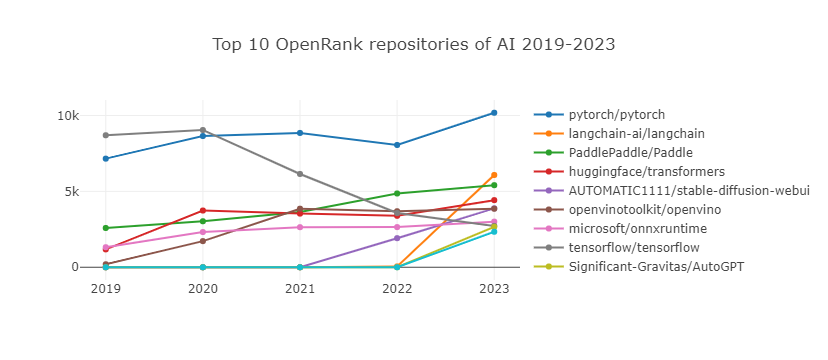

In [22]:
processTechFieldRepoOpenrank(':technology/ai', 'AI');

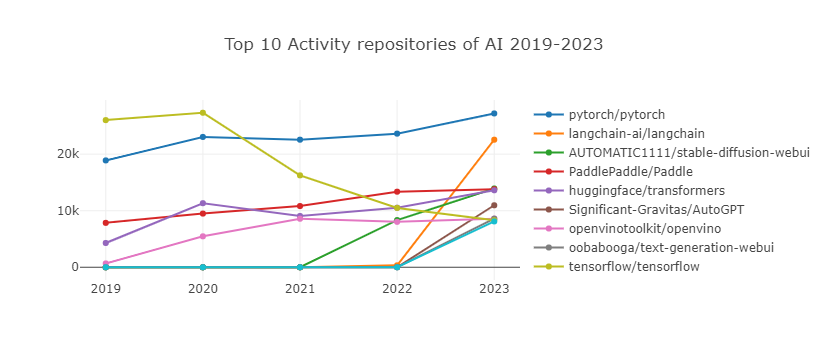

In [23]:
processTechFieldRepoActivity(':technology/ai', 'AI');

### 3.3 各子领域近5年变化趋势

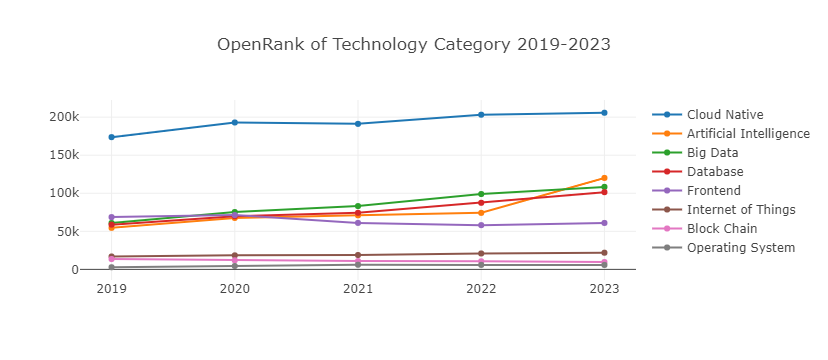

In [24]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: ['Tech-0'],  // ':technology' is invalid because there is no such a top level label for the technology directory. 'Tech-0' can be used to represent the first level technical field label
    startYear: 2019, endYear: 2023, endMonth: 12,
    groupBy: 'Tech-0',
    groupTimeRange: 'year',
    order: 'DESC',
    limit: -1
}).then(data => {
    var data = data.filter(i => i.id.startsWith(':technology'));
    data.map(row => {
        var parts = row.name.split(/ - /);
        row.name = parts[parts.length - 1];
        return row;
    });
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.openrank,
            name: row.name
        };
    }), {title: `OpenRank of Technology Category 2019-2023`, xaxis: { type: 'category' }});
})

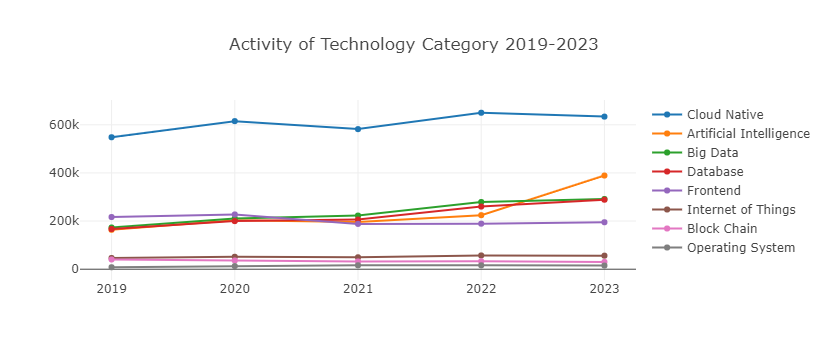

In [25]:
openDigger.index.activity.getRepoActivity({
    labelUnion: ['Tech-0'],
    startYear: 2019, endYear: 2023, endMonth: 12,
    groupBy: 'Tech-0',
    groupTimeRange: 'year',
    order: 'DESC',
    limit: -1
}).then(data => {
    var data = data.filter(i => i.id.startsWith(':technology'));
    data.map(row => {
        var parts = row.name.split(/ - /);
        row.name = parts[parts.length - 1];
        return row;
    });
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.activity,
            name: row.name
        };
    }), {title: `Activity of Technology Category 2019-2023`, xaxis: { type: 'category' }});
})

## 6.开源项目洞察

### 6.1 不同项目类型数量比例

![jupyter](./img/repo_count.png)

1. Libraries and Frameworks占比较高： 这一类项目占比约31.36%。这可能意味着在开源社区中，对于构建和提供工具、框架以及库的需求非常高。这些项目对于其他开发者来说是重要的基础资源。
2. Application Software也有相当份额： 这类项目占比约24.34%。这显示了开发者们不仅对于工具和基础设施感兴趣，也有很多人专注于构建实际的应用程序和软件产品。
3. Non Software类占比较大： 这类项目占比约23.17%。这表明GitHub社区中还存在着大量非软件类项目，可能涉及文档、教育、艺术、硬件或其他非编程相关领域的创作和贡献。
4. Software Tools和System Software占比较少： 这两类项目占比合计约21.13%。可能因为这些项目相对特定或者是较为专业化的工具和系统软件，因此数量较少。

### 6.2 不同项目类型 OpenRank 加总比例

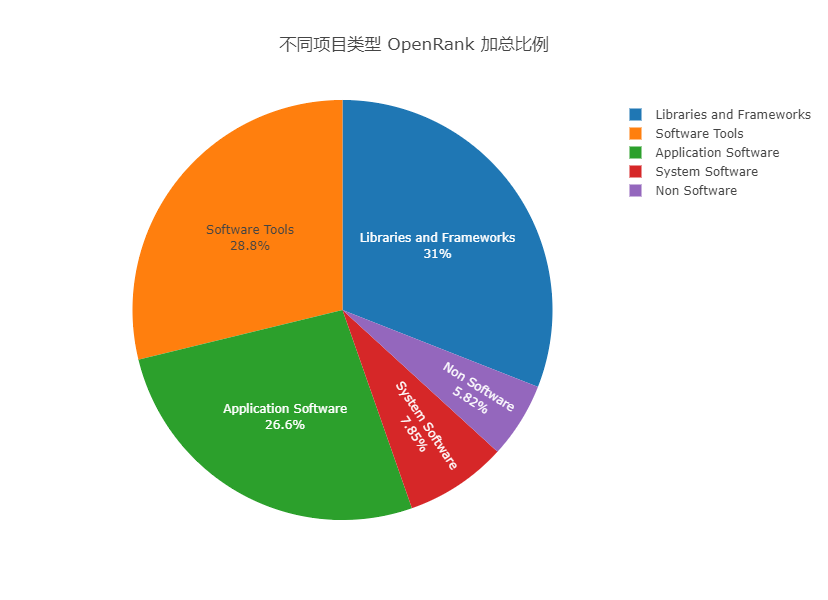

In [26]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':application_domain'],
    startYear: 2023, endYear: 2023, endMonth: 12,
    groupBy: 'Domain-0',
    groupTimeRange: 'year',
    order: 'DESC',
    limit: -1
}).then(data => {
    var data = data.filter(i => i.id.startsWith(':application_domain'));
    data.map(row => {
        var parts = row.name.split(/ - /);
        row.name = parts[parts.length - 1];
        return row;
    });
    openDigger.render.plotly([
    {labels: data.map(item => item.name), values: data.map(item => item.openrank[0]),type:'pie', name: 'times', textinfo: "label+percent"}], 
    {
        title: '不同项目类型 OpenRank 加总比例',
        xaxis: {type: 'category'},
        height: 600,
        //width:1050,
    });
})

### 6.3 不同项目类型 近5年 OpenRank 变化趋势

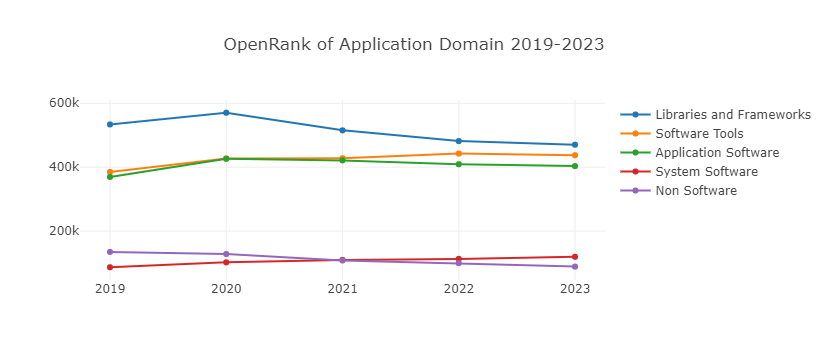

In [27]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':application_domain'],
    startYear: 2019, endYear: 2023, endMonth: 12,
    groupBy: 'Domain-0',
    groupTimeRange: 'year',
    order: 'DESC',
    limit: -1
}).then(data => {
    var data = data.filter(i => i.id.startsWith(':application_domain'));
    data.map(row => {
        var parts = row.name.split(/ - /);
        row.name = parts[parts.length - 1];
        return row;
    });
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.openrank,
            name: row.name
        };
    }), {title: `OpenRank of Application Domain 2019-2023`, xaxis: { type: 'category' }});
})

### 6.4 数据库领域项目分析

### 数据库领域项目 OpenRank Top 10

数据库领域 2023 年度 OpenRank 指标 Top 10 的项目排行榜

In [28]:
openDigger.index.openrank.getRepoOpenrank({
    ...baseOptions, labelUnion: [':technology/database'], startYear: year, endYear: year, limit: 10
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬─────────────────────────┬─────────────┐
│ (index) │     id      │ platform │          name           │  openrank   │
├─────────┼─────────────┼──────────┼─────────────────────────┼─────────────┤
│    0    │ '60246359'  │ 'GitHub' │ 'ClickHouse/ClickHouse' │ [ 4941.99 ] │
│    1    │ '99919302'  │ 'GitHub' │     'apache/doris'      │ [ 4307.26 ] │
│    2    │  '507775'   │ 'GitHub' │ 'elastic/elasticsearch' │ [ 3729.39 ] │
│    3    │ '16563587'  │ 'GitHub' │ 'cockroachdb/cockroach' │ [ 3443.7 ]  │
│    4    │ '402945349' │ 'GitHub' │  'StarRocks/starrocks'  │ [ 3194.56 ] │
│    5    │ '166515022' │ 'GitHub' │     'trinodb/trino'     │ [ 2703.4 ]  │
│    6    │ '17165658'  │ 'GitHub' │     'apache/spark'      │ [ 2654.02 ] │
│    7    │ '41986369'  │ 'GitHub' │     'pingcap/tidb'      │ [ 2200.38 ] │
│    8    │ '208728772' │ 'GitHub' │   'milvus-io/milvus'    │ [ 2001.11 ] │
│    9    │ '105944401' │ 'GitHub' │ 'yugabyte/yugabyte-db'  │ [ 1940.75 ] │

### 数据库领域项目 活跃度 Top 10

数据库领域 2023 年度 Activity 指标 Top 10 的项目排行榜

In [29]:
openDigger.index.activity.getRepoActivity({
    ...baseOptions, labelUnion: [':technology/database'], startYear: year, endYear: year, limit: 10
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬─────────────────────────────────┬──────────────┬──────────────┬───────────────┬─────────────┬─────────────┬────────────────┬─────────────┬───────────┐
│ (index) │     id      │ platform │              name               │   activity   │ participants │ issue_comment │ open_issue  │  open_pull  │ review_comment │ merged_pull │  details  │
├─────────┼─────────────┼──────────┼─────────────────────────────────┼──────────────┼──────────────┼───────────────┼─────────────┼─────────────┼────────────────┼─────────────┼───────────┤
│    0    │ '60246359'  │ 'GitHub' │     'ClickHouse/ClickHouse'     │ [ 12418.45 ] │  [ '4439' ]  │  [ '27230' ]  │ [ '3750' ]  │ [ '8314' ]  │  [ '11573' ]   │ [ '7361' ]  │ undefined │
│    1    │ '99919302'  │ 'GitHub' │         'apache/doris'          │ [ 12244.03 ] │  [ '2750' ]  │  [ '82001' ]  │ [ '1475' ]  │ [ '10836' ] │  [ '15234' ]   │ [ '9065' ]  │ undefined │
│    2    │ '402945349' │ 'GitHub' │      'StarRocks/starroc

### 数据库领域 近5年 OpenRank和Activity 变化趋势

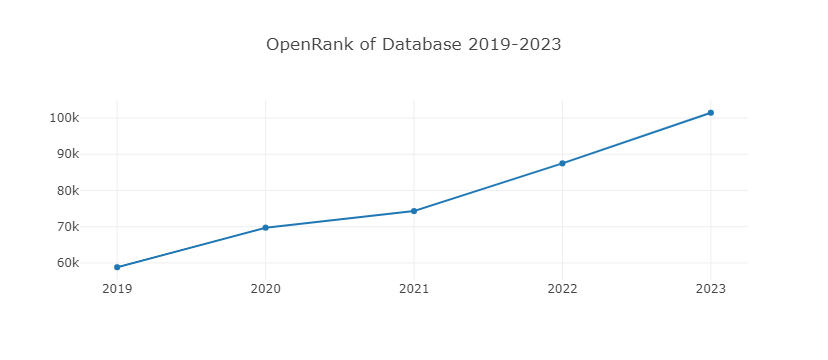

In [30]:
openDigger.index.openrank.getRepoOpenrank({
    ...baseOptions,
    labelUnion: ['Tech-0'],
    groupBy: 'Tech-0',
    limit: -1
}).then(data => {
    var data = data.filter(i => i.id.startsWith(':technology/database'));
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.openrank,
            name: row.name
        };
    }), {title: `OpenRank of Database 2019-2023`, xaxis: { type: 'category' }});
})

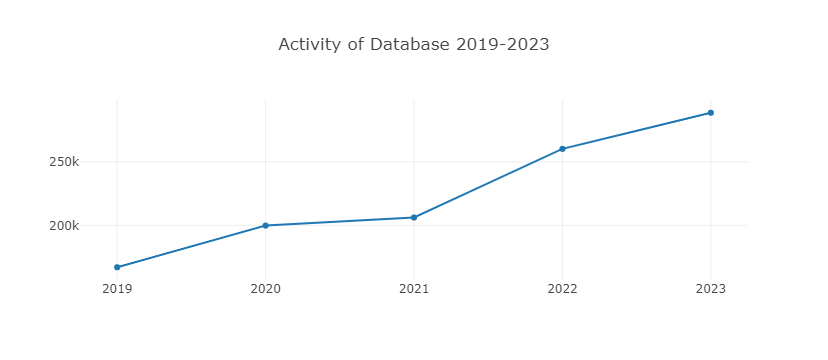

In [31]:
openDigger.index.activity.getRepoActivity({
    ...baseOptions,
    labelUnion: ['Tech-0'],
    groupBy: 'Tech-0',
    limit: -1
}).then(data => {
    var data = data.filter(i => i.id.startsWith(':technology/database'));
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.activity,
            name: row.name
        };
    }), {title: `Activity of Database 2019-2023`, xaxis: { type: 'category' }});
})

### 数据库领域各子领域 2023年 OpenRank 榜单

In [32]:
openDigger.index.openrank.getRepoOpenrank({
    ...baseOptions, 
    labelUnion: [':technology/database'], 
    startYear: year, endYear: year, 
    groupBy: 'Tech-1', 
    limit: -1
}).then(data => {
    var data = data.filter(i => i.id.startsWith(':technology/database'));
    data.map(row => {
        var parts = row.name.split(/ - /);
        row.name = parts[parts.length - 1];
        return row;
    });
    console.table(data);
});

┌─────────┬────────────────────────────────────────┬──────────┬───────────────────┬──────────────┐
│ (index) │                   id                   │ platform │       name        │   openrank   │
├─────────┼────────────────────────────────────────┼──────────┼───────────────────┼──────────────┤
│    0    │   ':technology/database/relational'    │  'All'   │   'Relational'    │ [ 58092.36 ] │
│    1    │    ':technology/database/key_value'    │  'All'   │    'Key-value'    │ [ 21834.08 ] │
│    2    │    ':technology/database/document'     │  'All'   │    'Document'     │ [ 17264.93 ] │
│    3    │  ':technology/database/search_engine'  │  'All'   │  'Search Engine'  │ [ 8093.77 ]  │
│    4    │   ':technology/database/wide_column'   │  'All'   │   'Wide Column'   │ [ 7896.43 ]  │
│    5    │   ':technology/database/time_series'   │  'All'   │   'Time Series'   │ [ 7813.54 ]  │
│    6    │      ':technology/database/graph'      │  'All'   │      'Graph'      │ [ 5196.52 ]  │
│    7    

### 数据库领域各子领域 2023年 Activity 榜单

In [33]:
openDigger.index.activity.getRepoActivity({
    ...baseOptions, 
    labelUnion: [':technology/database'], 
    startYear: year, endYear: year, 
    groupBy: 'Tech-1', 
    limit: -1
}).then(data => {
    var data = data.filter(i => i.id.startsWith(':technology/database'));
    data.map(row => {
        var parts = row.name.split(/ - /);
        row.name = parts[parts.length - 1];
        return row;
    });
    console.table(data);
});

┌─────────┬────────────────────────────────────────┬──────────┬───────────────────┬───────────────┬──────────────┬───────────────┬─────────────┬──────────────┬────────────────┬─────────────┬───────────┐
│ (index) │                   id                   │ platform │       name        │   activity    │ participants │ issue_comment │ open_issue  │  open_pull   │ review_comment │ merged_pull │  details  │
├─────────┼────────────────────────────────────────┼──────────┼───────────────────┼───────────────┼──────────────┼───────────────┼─────────────┼──────────────┼────────────────┼─────────────┼───────────┤
│    0    │   ':technology/database/relational'    │  'All'   │   'Relational'    │ [ 161025.44 ] │ [ '46084' ]  │ [ '584328' ]  │ [ '49257' ] │ [ '118340' ] │  [ '224215' ]  │ [ '90948' ] │ undefined │
│    1    │    ':technology/database/key_value'    │  'All'   │    'Key-value'    │ [ 62501.64 ]  │ [ '19782' ]  │ [ '249385' ]  │ [ '15526' ] │ [ '34079' ]  │  [ '95487' ]   │ [ '24839' ]

### 数据库领域各子领域 近5年 OpenRank 变化趋势

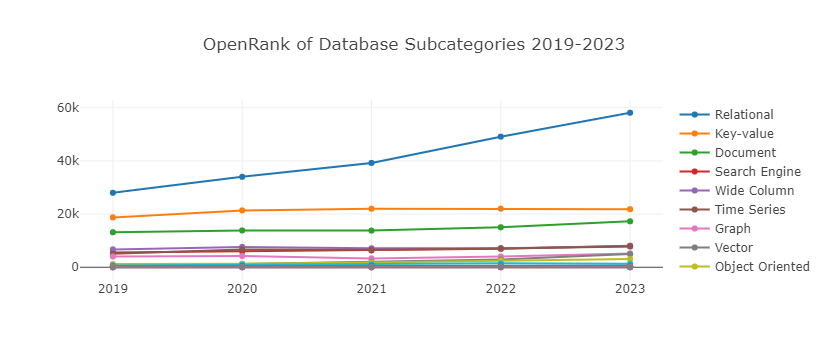

In [34]:
openDigger.index.openrank.getRepoOpenrank({
    ...baseOptions,
    labelUnion: [':technology/database'],
    groupBy: 'Tech-1',
    limit: -1
}).then(data => {
    var data = data.filter(i => i.id.startsWith(':technology/database'));
    data.map(row => {
        var parts = row.name.split(/ - /);
        row.name = parts[parts.length - 1];
        return row;
    });
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.openrank,
            name: row.name
        };
    }), {title: `OpenRank of Database Subcategories 2019-2023`, xaxis: { type: 'category' }});
})

### 数据库领域各子领域 近5年 Activity 变化趋势

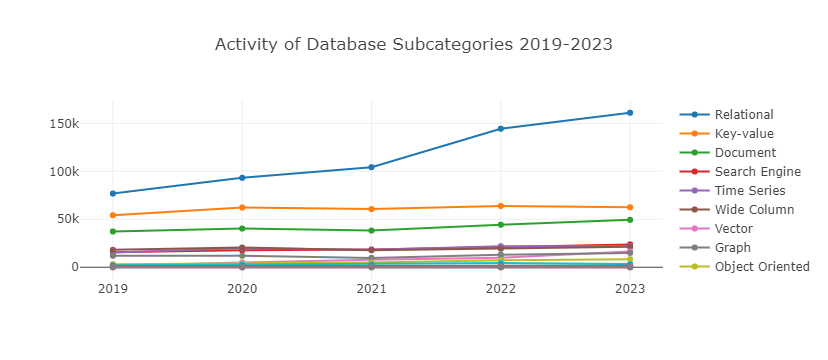

In [35]:
openDigger.index.activity.getRepoActivity({
    ...baseOptions,
    labelUnion: [':technology/database'],
    groupBy: 'Tech-1',
    limit: -1
}).then(data => {
    var data = data.filter(i => i.id.startsWith(':technology/database'));
    data.map(row => {
        var parts = row.name.split(/ - /);
        row.name = parts[parts.length - 1];
        return row;
    });
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.activity,
            name: row.name
        };
    }), {title: `Activity of Database Subcategories 2019-2023`, xaxis: { type: 'category' }});
})

### 开源数据库 OpenRank Top30 项目时区打点分布图

此处将根据开源数据库项目 OpenRank Top 30 在 2023 全年中的事件按事件分布情况绘制打孔图，从而可以观察项目的工作时间分布情况。

In [36]:
openDigger.index.openrank.getRepoOpenrank({
    ...baseOptions, 
    labelUnion: [':technology/database'], 
    startYear: year, endYear: year,
    limit: 30,
}).then(data => {
    var ids = data.map(r => r.id);
    var sql = `
SELECT repo_id, argMax(name, time) AS name, groupArray(count) AS data
FROM
(SELECT repo_id, argMax(repo_name, created_at) AS name, MAX(created_at) AS time, toDayOfWeek(created_at) AS weekday, toHour(created_at) AS hour, COUNT() AS count
FROM events
WHERE toYear(created_at)=2023 AND repo_id IN (${ids.join(',')})
GROUP BY repo_id, weekday, hour
ORDER BY weekday, hour)
GROUP BY repo_id
    `;
    openDigger.driver.clickhouse.query(sql).then(data => {
        data.forEach(d => {
            const maxCount = Math.max(...d[2]);
            console.log(`项目 ${d[1]} 的工作时间分布链接为：https://oss.x-lab.info/open_digger/assets/working_hour_distribution.svg?data=${JSON.stringify(d[2].map(c => Math.ceil(parseInt(c)*10/maxCount)))}`);
        });
    });
});

项目 apache/pinot 的工作时间分布链接为：https://oss.x-lab.info/open_digger/assets/working_hour_distribution.svg?data=[2,3,2,2,2,2,2,4,2,2,2,2,2,2,3,3,4,6,5,6,5,5,6,6,5,5,3,4,3,4,4,3,3,2,2,2,2,2,3,3,5,7,8,6,7,9,10,9,7,5,4,3,4,5,6,5,4,3,2,3,2,2,3,4,4,7,7,7,6,7,10,7,7,5,5,3,4,3,4,3,3,3,2,3,2,2,3,4,5,6,9,7,6,6,5,7,6,4,3,3,3,3,4,5,3,2,2,3,2,2,3,3,5,5,6,6,6,6,8,7,7,4,3,2,2,2,2,2,2,2,1,1,1,1,1,1,1,2,2,2,2,1,2,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,2,2]
项目 apple/foundationdb 的工作时间分布链接为：https://oss.x-lab.info/open_digger/assets/working_hour_distribution.svg?data=[1,1,1,1,2,2,2,1,1,1,1,1,1,2,2,3,5,8,8,9,8,8,9,8,6,6,4,3,3,2,2,2,2,1,1,1,1,1,2,3,6,8,9,8,9,9,10,9,7,5,4,3,3,3,3,2,2,1,1,1,1,2,2,3,5,7,8,8,9,9,10,9,7,6,4,3,4,3,2,2,1,1,1,1,1,1,2,2,5,7,8,10,9,10,10,9,7,4,3,3,3,3,2,2,2,1,1,1,1,1,2,3,5,8,8,8,9,10,9,8,7,4,3,3,2,2,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
项目 apache/shardingsphere 的工作时间分布链接为：https://oss.x-lab.info/open_digger/assets/working_hour_distributio

### 6.5 生成式AI领域项目分析

### 生成式AI领域项目 OpenRank Top 10

此处给出数个生成式AI领域 2023 年度 OpenRank 指标 Top 10 项目及其自 2018 年起的 OpenRank 变化趋势。*

In [37]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':technology/ai/generative_ai'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬────────────────────────────────────────┬─────────────┐
│ (index) │     id      │ platform │                  name                  │  openrank   │
├─────────┼─────────────┼──────────┼────────────────────────────────────────┼─────────────┤
│    0    │ '552661142' │ 'GitHub' │        'langchain-ai/langchain'        │ [ 6080.25 ] │
│    1    │ '155220641' │ 'GitHub' │       'huggingface/transformers'       │ [ 4422.84 ] │
│    2    │ '527591471' │ 'GitHub' │ 'AUTOMATIC1111/stable-diffusion-webui' │ [ 3881.6 ]  │
│    3    │ '614765452' │ 'GitHub' │     'Significant-Gravitas/AutoGPT'     │ [ 2664.85 ] │
│    4    │ '612354784' │ 'GitHub' │         'ggerganov/llama.cpp'          │ [ 2339.8 ]  │
│    5    │ '580642043' │ 'GitHub' │   'oobabooga/text-generation-webui'    │ [ 2242.5 ]  │
│    6    │ '208728772' │ 'GitHub' │           'milvus-io/milvus'           │ [ 2001.11 ] │
│    7    │ '560704231' │ 'GitHub' │        'run-llama/llama_index'         │ [ 

### 生成式AI领域项目 活跃度 Top 10

In [38]:
openDigger.index.activity.getRepoActivity({
    labelUnion: [':technology/ai/generative_ai'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬────────────────────────────────────────┬──────────────┬──────────────┬───────────────┬────────────┬────────────┬────────────────┬─────────────┬───────────┐
│ (index) │     id      │ platform │                  name                  │   activity   │ participants │ issue_comment │ open_issue │ open_pull  │ review_comment │ merged_pull │  details  │
├─────────┼─────────────┼──────────┼────────────────────────────────────────┼──────────────┼──────────────┼───────────────┼────────────┼────────────┼────────────────┼─────────────┼───────────┤
│    0    │ '552661142' │ 'GitHub' │        'langchain-ai/langchain'        │ [ 22563.04 ] │ [ '13068' ]  │  [ '32196' ]  │ [ '4851' ] │ [ '7732' ] │   [ '6693' ]   │ [ '5978' ]  │ undefined │
│    1    │ '527591471' │ 'GitHub' │ 'AUTOMATIC1111/stable-diffusion-webui' │ [ 13933.03 ] │ [ '11064' ]  │  [ '22481' ]  │ [ '3444' ] │ [ '1229' ] │   [ '192' ]    │  [ '828' ]  │ undefined │
│    2    │ '155220641' │ 'GitHub' 

### 生成式AI领域 OpenRank Top 10 项目近5年增长趋势

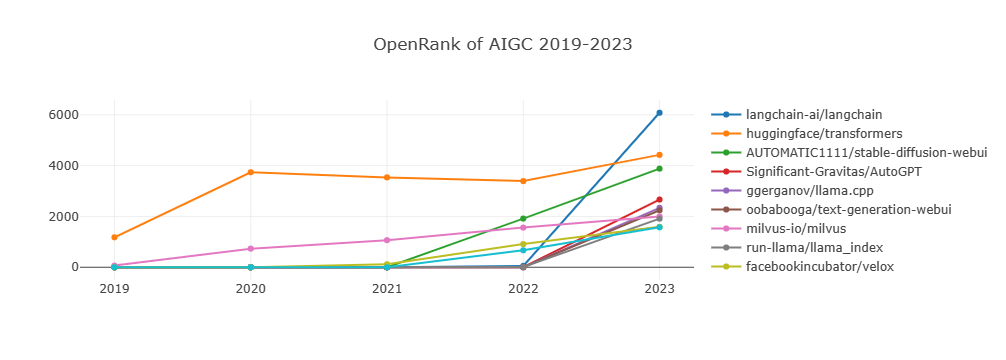

In [39]:
openDigger.index.openrank.getRepoOpenrank({
    startYear, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', order: 'DESC', labelIntersect: [':technology/ai/generative_ai'], limit: 10
}).then(data => {
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.openrank,
            name: row.name
        };
    }), {title: `OpenRank of AIGC 2019-2023`, xaxis: { type: 'category' }});
});

### 生成式AI领域 活跃度 Top 10 项目近5年增长趋势

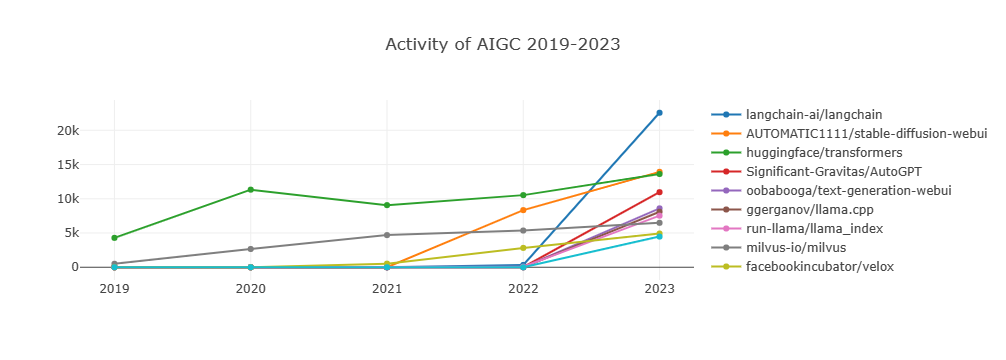

In [40]:
openDigger.index.activity.getRepoActivity({
    startYear, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', order: 'DESC', labelIntersect: [':technology/ai/generative_ai'], limit: 10
}).then(data => {
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.activity,
            name: row.name
        };
    }), {title: `Activity of AIGC 2019-2023`, xaxis: { type: 'category' }});
});

### 生成式AI各子领域近5年增长趋势

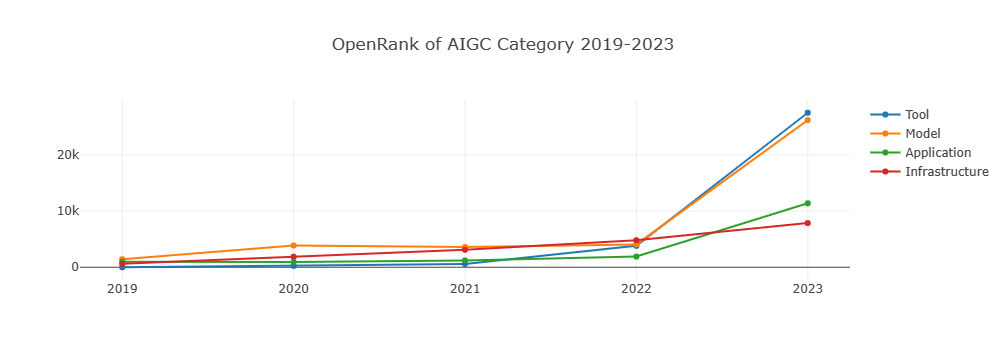

In [41]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':technology/ai/generative_ai'],
    startYear: 2019, endYear: 2023, endMonth: 12,
    groupBy: 'Tech-2',
    groupTimeRange: 'year',
    order: 'DESC',
    limit: -1
}).then(data => {
    var data = data.filter(i => i.id.startsWith(':technology/ai/generative_ai'));
    data.map(row => {
        var parts = row.name.split(/ - /);
        row.name = parts[parts.length - 1];
        return row;
    });
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.openrank,
            name: row.name
        };
    }), {title: `OpenRank of AIGC Category 2019-2023`, xaxis: { type: 'category' }});
})

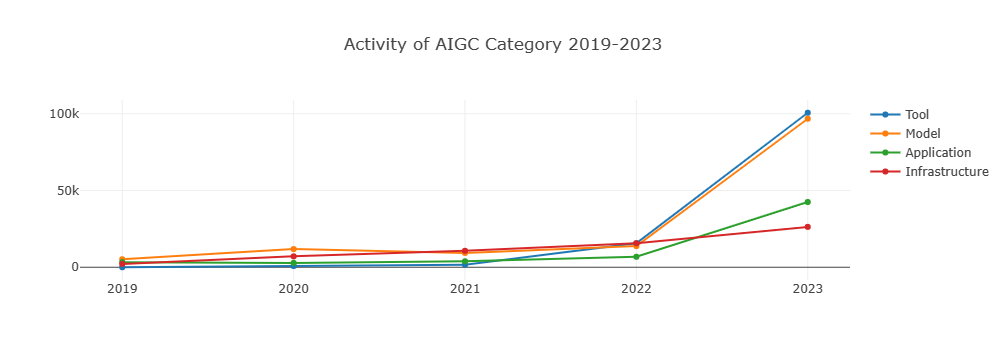

In [42]:
openDigger.index.activity.getRepoActivity({
    labelUnion: [':technology/ai/generative_ai'],
    startYear: 2019, endYear: 2023, endMonth: 12,
    groupBy: 'Tech-2',
    groupTimeRange: 'year',
    order: 'DESC',
    limit: -1
}).then(data => {
    var data = data.filter(i => i.id.startsWith(':technology/ai/generative_ai'));
    data.map(row => {
        var parts = row.name.split(/ - /);
        row.name = parts[parts.length - 1];
        return row;
    });
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.activity,
            name: row.name
        };
    }), {title: `Activity of AIGC Category 2019-2023`, xaxis: { type: 'category' }});
})

### 6.6 项目 Topic 分析

![jupyter](./img/topic_top10.png)